In [ ]:
#This project is about the "Predicting incomes of individuals using U.S census data"
#project motive is to predicting whether an individual earns more than $50k per year.
#Part A: EDA
#part B:Model Building

In [25]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Part A

In [27]:
#data preprocessing

import pandas as pd

column_names = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital-Status",
                "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
                "Hours-Per-Week", "Native-Country", "Income"]


adult = pd.read_csv("C:\\Users\\arun6\\Downloads\\adult1\\adult.data", names=column_names, na_values='?', skipinitialspace=True)
adult


,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-Gain    32561 non-null  int64 
 11  Capital-Loss    32561 non-null  int64 
 12  Hours-Per-Week  32561 non-null  int64 
 13  Native-Country  31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
adult.shape

(32561, 15)

In [35]:
adult.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Marital-Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
Hours-Per-Week     int64
Native-Country    object
Income            object
dtype: object

In [37]:
adult.isna().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-Per-Week       0
Native-Country     583
Income               0
dtype: int64

In [39]:

adult_new = adult.copy()
adult_new = adult_new.fillna(method='ffill')
adult_new

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [41]:
adult_new.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country',
       'Income'],
      dtype='object')

In [43]:
adult_new = adult_new.drop(columns=['fnlwgt','Relationship','Native-Country'],axis=1)
adult_new

,Age,Workclass,Education,Education-Num,Marital-Status,Occupation,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,<=50K


In [45]:
adult_new.describe()

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [47]:
adult_new.isna().sum()

Age               0
Workclass         0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-Per-Week    0
Income            0
dtype: int64

In [49]:
# cleans the 'Income' column in the adult_new dataset

adult_new['Income'] = adult_new['Income'].str.strip().str.replace('.', '', regex=False)
adult_new

,Age,Workclass,Education,Education-Num,Marital-Status,Occupation,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,<=50K


Text(0.5, 1.0, 'Income Distribution')

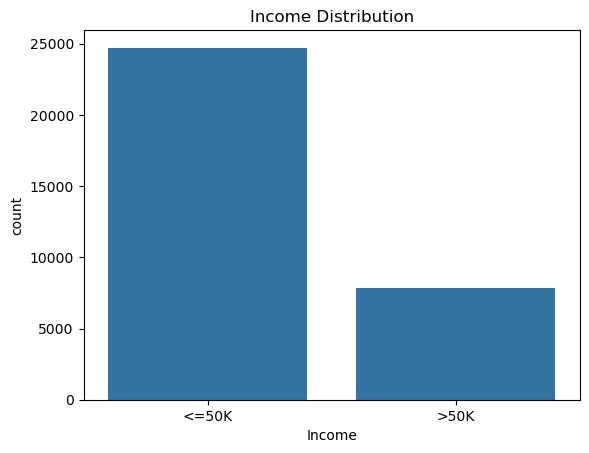

In [51]:
sns.countplot(x='Income',data=adult_new)
plt.title('Income Distribution')

Text(0.5, 1.0, 'Age Disrtribution')

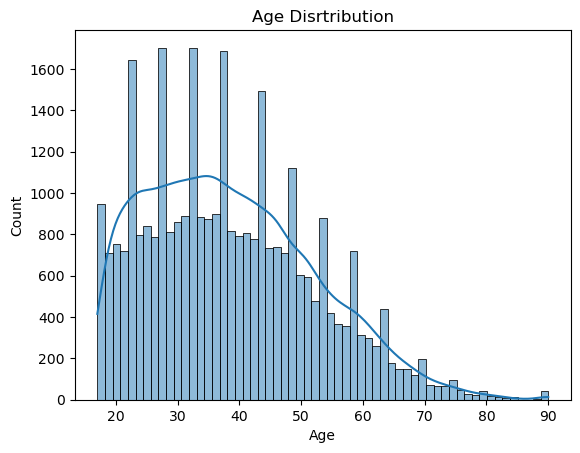

In [53]:
sns.histplot(adult_new['Age'],kde=True)
plt.title('Age Disrtribution')

In [54]:
#ENCODE CATEGORICAL VARIABLES

from sklearn.preprocessing import LabelEncoder

In [57]:
encode=LabelEncoder()
adult_new['Income']=encode.fit_transform(adult_new['Income'])
adult_new['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int32

In [59]:
adult_new.columns

Index(['Age', 'Workclass', 'Education', 'Education-Num', 'Marital-Status',
       'Occupation', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss',
       'Hours-Per-Week', 'Income'],
      dtype='object')

In [61]:
adult_new=pd.get_dummies(adult_new,drop_first=True)
adult_new

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Income,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,...,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,39,13,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,50,13,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
2,38,9,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
3,53,7,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
4,28,13,0,0,40,0,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
32557,40,9,0,0,40,1,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
32558,58,9,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
32559,22,9,0,0,20,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True


In [63]:
#Separating Features & Labels

x=adult_new.drop(columns=['Income'])
x

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,...,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
4,28,13,0,0,40,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
32557,40,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
32558,58,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
32559,22,9,0,0,20,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True


In [65]:
y=adult_new['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int32

In [67]:
# train-test split

from sklearn.model_selection import train_test_split

In [69]:
#- x_train: Features for training.
#- x_test: Features for testing.
#- y_train: Target labels for training.
#- y_test: Target labels for testing.

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42,stratify=y)


In [71]:
x_test.head()

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,...,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
9009,31,16,0,0,40,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True
25134,20,10,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
16682,78,13,9386,0,45,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
27044,32,13,0,0,44,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
3302,61,9,0,0,3,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True


In [73]:
x_train.shape

(26048, 51)

In [75]:
x_test.shape

(6513, 51)

In [77]:
#Standardization (Feature Scaling)
#- Helps models that rely on distance-based calculations (e.g., KNN, SVM, Logistic Regression).

from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()
scaler

StandardScaler()

In [81]:
#- scaled_x_train now contains the standardized version of x_train, where all feature values have been adjusted to a common scale.

scaled_x_train=scaler.fit_transform(x_train)
scaled_x_train

array([[-0.48306519,  1.13054018, -0.14531872, ..., -0.09355334,
         0.41105095,  0.70285582],
       [ 0.32334184,  1.51766649, -0.14531872, ..., -0.09355334,
         0.41105095, -1.4227669 ],
       [-1.36278194, -0.41796503, -0.14531872, ..., -0.09355334,
         0.41105095, -1.4227669 ],
       ...,
       [ 1.20305859, -0.41796503, -0.14531872, ..., -0.09355334,
        -2.43278842,  0.70285582],
       [-0.92292356,  1.13054018, -0.14531872, ..., -0.09355334,
         0.41105095,  0.70285582],
       [-1.43609167, -1.57934394, -0.14531872, ..., -0.09355334,
         0.41105095, -1.4227669 ]])

In [83]:
scaled_x_test=scaler.fit_transform(x_train)
scaled_x_test

array([[-0.48306519,  1.13054018, -0.14531872, ..., -0.09355334,
         0.41105095,  0.70285582],
       [ 0.32334184,  1.51766649, -0.14531872, ..., -0.09355334,
         0.41105095, -1.4227669 ],
       [-1.36278194, -0.41796503, -0.14531872, ..., -0.09355334,
         0.41105095, -1.4227669 ],
       ...,
       [ 1.20305859, -0.41796503, -0.14531872, ..., -0.09355334,
        -2.43278842,  0.70285582],
       [-0.92292356,  1.13054018, -0.14531872, ..., -0.09355334,
         0.41105095,  0.70285582],
       [-1.43609167, -1.57934394, -0.14531872, ..., -0.09355334,
         0.41105095, -1.4227669 ]])

In [ ]:
#part B

In [85]:
#Logistic Regression
#Logistic Regression is a supervised machine learning algorithm used for classification tasks.
#logistic regression predicts probabilities for categorical outcomes.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [87]:
#initializes a Logistic Regression model using the liblinear solver.

model=LogisticRegression(solver='liblinear')
model

LogisticRegression(solver='liblinear')

In [89]:
#function is used to train a machine learning model by learning patterns from the training data. 

model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [91]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [93]:
#Accuracy Score
#- This checks how well the predictions match the actual labels.

accuracy_log=accuracy_score(y_test,y_pred)
accuracy_log

0.8512206356517734

In [95]:
print("Accuracy:",accuracy_log)

Accuracy: 0.8512206356517734


In [97]:
#Confusion Matrix
#A Confusion Matrix is a tool used to evaluate the performance of a classification model

confusion_matrix(y_test,y_pred)

array([[4621,  324],
       [ 645,  923]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

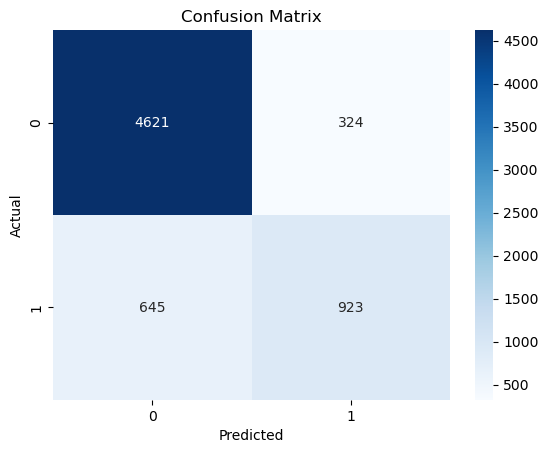

In [99]:
#- Displays the confusion matrix as a heatmap for better readability.

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [101]:
#- Summarizes model performance for each class.
#- Includes precision, recall, F1-score, and support.
#- Helps analyze imbalanced datasets.

print("Classification Report :\n")
print(classification_report(y_test,y_pred))

Classification Report :

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.59      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.85      6513



In [103]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

In [105]:
model=RandomForestClassifier(n_estimators=50,random_state=100)
model

RandomForestClassifier(n_estimators=50, random_state=100)

In [107]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=100)

In [108]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [109]:
#Accuracy Score

accuracy_rand=accuracy_score(y_test,y_pred)
accuracy_rand
print("Accuracy :",accuracy_rand)

Accuracy : 0.8479963150621833


In [110]:
##Confusion Matrix

confusion_matrix(y_test,y_pred)

array([[4533,  412],
       [ 578,  990]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

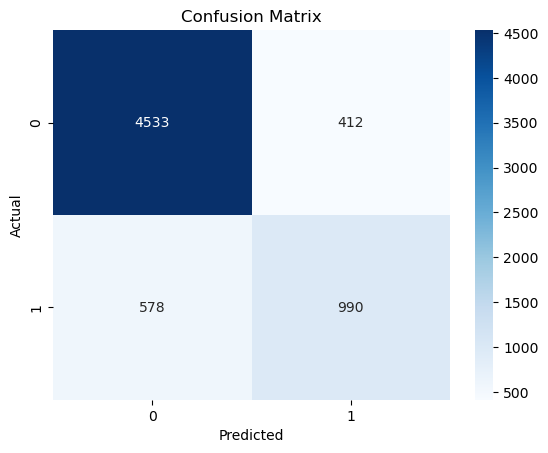

In [115]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [117]:
print("Classification Report :\n")
print(classification_report(y_test,y_pred))

Classification Report :

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4945
           1       0.71      0.63      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.85      6513



In [206]:
#Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier

In [208]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model

DecisionTreeClassifier(max_depth=3)

In [210]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [212]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [214]:
#Accuracy Score

accuracy_tree=accuracy_score(y_test,y_pred)
accuracy_tree
print("Accuracy :",accuracy_rand)

Accuracy : 0.8479963150621833


In [216]:
#Confusion Matrix

confusion_matrix(y_test,y_pred)

array([[4695,  247],
       [ 761,  810]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

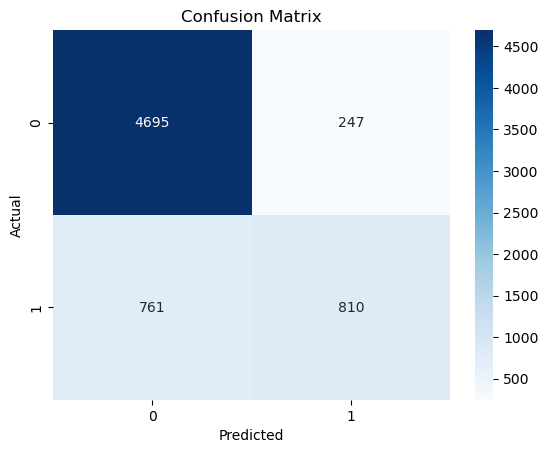

In [218]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [220]:
print("Classification Report :\n")
print(classification_report(y_test,y_pred))

Classification Report :

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4942
           1       0.77      0.52      0.62      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.73      0.76      6513
weighted avg       0.84      0.85      0.83      6513



In [222]:
#Tree Ploting

from sklearn.tree import plot_tree

<function matplotlib.pyplot.show(close=None, block=None)>

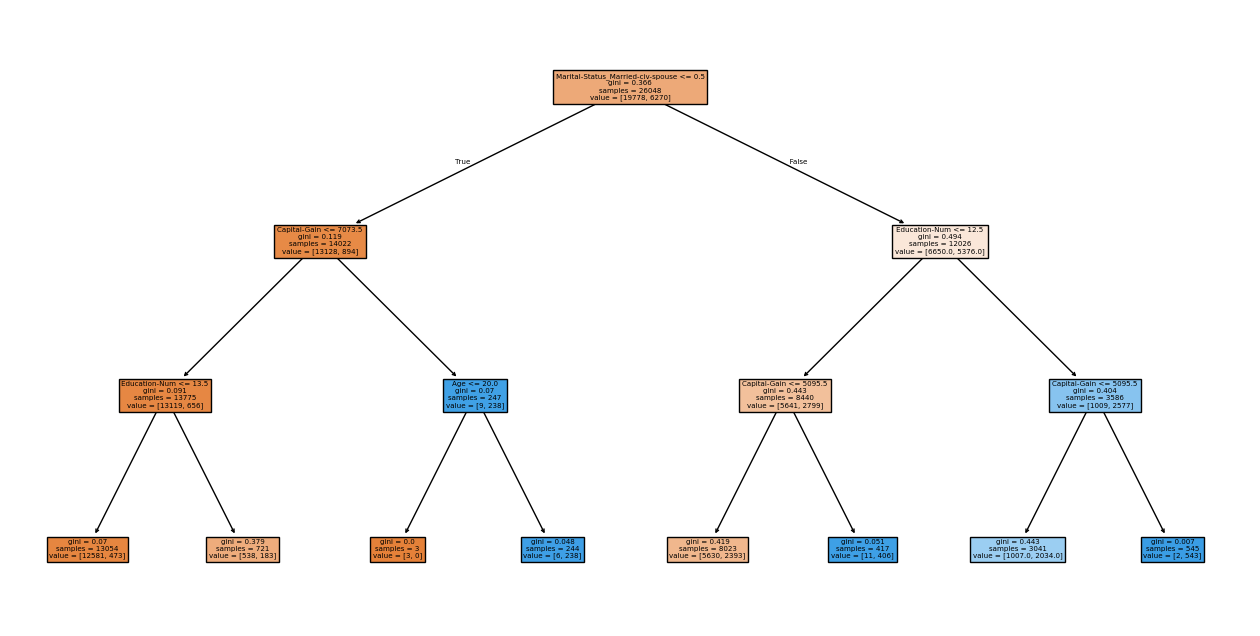

In [224]:
plt.figure(figsize=(16,8))  
plot_tree(model, feature_names=x.columns, filled=True) 
plt.show



In [139]:
#K-Nearest Neighbors (KNN) Classification

from sklearn.neighbors import KNeighborsClassifier

In [141]:
model=KNeighborsClassifier(n_neighbors=3)
model

KNeighborsClassifier(n_neighbors=3)

In [143]:
model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [145]:
y_pred=model.predict(scaled_x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [146]:
print(len(y_test), len(y_pred))  

6513 26048


In [147]:
y_pred = model.predict(x_test)  

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [149]:
y_test = y_test.to_numpy()  

In [150]:
print(y_pred.shape, y_test.shape)  

(6513,) (6513,)


In [151]:
#Confusion Matrix

confusion_matrix(y_test,y_pred)

array([[4352,  590],
       [1391,  180]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

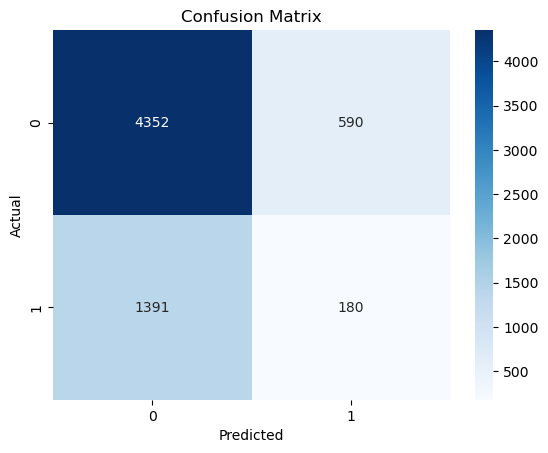

In [153]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [155]:
#Accuracy Score

accuracy_knn=accuracy_score(y_test,y_pred)
accuracy_knn
print("Accuracy :",accuracy_rand)

Accuracy : 0.8479963150621833


In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      4942
           1       0.23      0.11      0.15      1571

    accuracy                           0.70      6513
   macro avg       0.50      0.50      0.48      6513
weighted avg       0.63      0.70      0.66      6513



In [157]:
#Model Evaluation & Comparison

model_name={"LogisticRegression":round(accuracy_log,2),
            "RandomForestClassifier":round(accuracy_rand,2),
            "DecisionTreeClassifier":round(accuracy_tree,2),
            "KNeighborsClassifier":round(accuracy_knn,2)}
model_name

{'LogisticRegression': 0.85,
 'RandomForestClassifier': 0.85,
 'DecisionTreeClassifier': 0.85,
 'KNeighborsClassifier': 0.7}

In [174]:
#visualizing and comparing model accuracies


project_report = pd.DataFrame(list(model_name.items()), columns=["Model", "Accuracy"])
project_report = project_report.sort_values(by="Accuracy", ascending=False)  

print(project_report)

                    Model  Accuracy
0      LogisticRegression      0.85
1  RandomForestClassifier      0.85
2  DecisionTreeClassifier      0.85
3    KNeighborsClassifier      0.70


In [159]:
import matplotlib.pyplot as plt

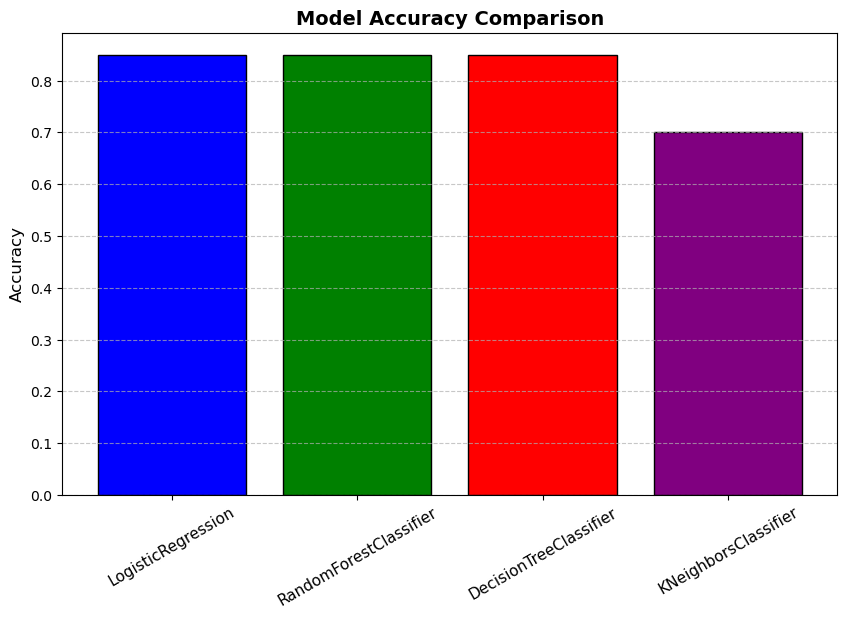

In [176]:
plt.figure(figsize=(10,6))
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.bar(Model_name, Accuracies, color=['blue', 'green', 'red', 'purple'], edgecolor='black')
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=30, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()